# 3.6 Predicting house prices: a regression example

## 3.6.1 The Boston Housing Price dataset

- we have to predict price
- boston housing mid-1970
- 506 data samples
- 404 training and 102 testing samples
- 13 Features (number of columns in X)

#### Listing 3.24 Loading the Boston housing dataset

In [1]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57344/57026 [==============================] - 0s 2us/step


In [2]:
train_data.shape

(404, 13)

In [3]:
test_data.shape

(102, 13)

In [4]:
train_data[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [5]:
train_targets[0]

15.2

### 3.6.2 Preparing the data

#### Listing 3.25 Normalizing the data

In [6]:
mean = train_data.mean(axis=0)
train_data -= mean

std = train_data.std(axis=0)

train_data /= std
test_data -= mean
test_data /= std

In [7]:
mean

array([3.74511057e+00, 1.14801980e+01, 1.11044307e+01, 6.18811881e-02,
       5.57355941e-01, 6.26708168e+00, 6.90106436e+01, 3.74027079e+00,
       9.44059406e+00, 4.05898515e+02, 1.84759901e+01, 3.54783168e+02,
       1.27408168e+01])

In [8]:
std

array([9.22929073e+00, 2.37382770e+01, 6.80287253e+00, 2.40939633e-01,
       1.17147847e-01, 7.08908627e-01, 2.79060634e+01, 2.02770050e+00,
       8.68758849e+00, 1.66168506e+02, 2.19765689e+00, 9.39946015e+01,
       7.24556085e+00])

In [9]:
train_data[0]

array([-0.27224633, -0.48361547, -0.43576161, -0.25683275, -0.1652266 ,
       -0.1764426 ,  0.81306188,  0.1166983 , -0.62624905, -0.59517003,
        1.14850044,  0.44807713,  0.8252202 ])

In [10]:
(21 - 1.84759901e+01)/2.19765689e+00

1.1485004376638608

In [11]:
train_data.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

#### 3.6.3 Building your network

In [12]:
from tensorflow.keras import models
from tensorflow.keras import layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

#### Listing 3.27 K-fold validation

In [13]:
import numpy as np
k=4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

num_epochs = 500
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    
model = build_model()
history = model.fit(partial_train_data, partial_train_targets,
                    validation_data=(val_data, val_targets),
                    epochs=num_epochs, batch_size=1, verbose=0)
mae_history = history.history['val_mae']
all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [15]:
history.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

#### Listing 3.29 Building the history of successive mean K-fold validation scores

In [16]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

In [17]:
average_mae_history

[5.752235412597656,
 4.106407642364502,
 4.064900875091553,
 3.149954319000244,
 2.8984553813934326,
 3.0012388229370117,
 2.870439291000366,
 2.673628807067871,
 2.7518887519836426,
 2.678881883621216,
 3.0357918739318848,
 2.458127975463867,
 2.9579062461853027,
 2.5860419273376465,
 2.566612720489502,
 2.6326520442962646,
 2.7340919971466064,
 2.539569616317749,
 2.513219118118286,
 2.492432117462158,
 2.4693758487701416,
 2.5062038898468018,
 2.5752110481262207,
 2.458723545074463,
 2.4548487663269043,
 2.68276047706604,
 2.4398906230926514,
 2.3708903789520264,
 2.4982798099517822,
 2.598565101623535,
 2.4905002117156982,
 2.579288959503174,
 2.5623223781585693,
 2.2796897888183594,
 2.460047721862793,
 2.713510036468506,
 2.2885913848876953,
 2.4757142066955566,
 2.650665521621704,
 2.421812057495117,
 2.371663808822632,
 2.371387243270874,
 2.6292309761047363,
 2.4810333251953125,
 2.346963405609131,
 2.510460138320923,
 2.7089850902557373,
 2.268390417098999,
 2.444118738174438

#### Listing 3.30 Plotting validation scores

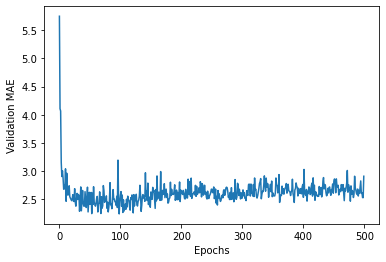

In [18]:
import matplotlib.pyplot as plt
plt.plot(average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

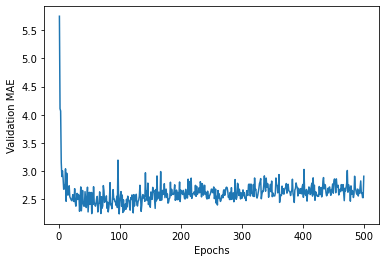

In [19]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

#### Listing 3.31 Plotting validation scores, excluding the first 10 data points


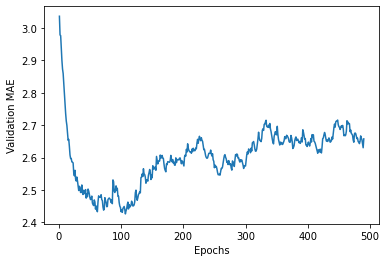

In [20]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points
    
smooth_mae_history = smooth_curve(average_mae_history[10:])
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()


#### Listing 3.32 Training the final model

In [21]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=100, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 998us/step - loss: 16.7409 - mae: 2.5223


In [22]:
test_mse_score

16.74091148376465

In [23]:
test_mae_score

2.5223228931427

You’re still off by about $2,550.

In [24]:
model.predict(test_data)

array([[ 9.101512 ],
       [19.235403 ],
       [21.59996  ],
       [34.134117 ],
       [24.424324 ],
       [21.785686 ],
       [26.902012 ],
       [20.743797 ],
       [19.27387  ],
       [22.435722 ],
       [18.378298 ],
       [16.110445 ],
       [15.859771 ],
       [41.742867 ],
       [21.646078 ],
       [19.677326 ],
       [25.443823 ],
       [18.54337  ],
       [18.121853 ],
       [26.221228 ],
       [10.9041395],
       [14.015107 ],
       [21.410603 ],
       [14.294491 ],
       [19.036343 ],
       [24.90824  ],
       [28.926525 ],
       [29.993353 ],
       [10.977785 ],
       [19.271265 ],
       [20.009024 ],
       [14.671129 ],
       [32.480915 ],
       [23.425598 ],
       [17.223736 ],
       [ 6.36365  ],
       [16.5881   ],
       [17.627003 ],
       [19.369482 ],
       [25.495083 ],
       [30.972782 ],
       [26.577679 ],
       [13.412501 ],
       [43.914192 ],
       [29.206902 ],
       [25.445446 ],
       [27.460815 ],
       [17.13